In this notebook, we will run a ready-made network starting from some ATLAS data, which is already normalized. There is also an alternative to train the network from scratch.  

## Look into the dataset

First we need to make sure that Python 3.8 is used in the notebook. It is required in order to open this certain .pkl-file. 

In [56]:
import sys
sys.version

'3.7.10 (default, Feb 20 2021, 21:17:23) \n[GCC 7.5.0]'

Then, we will import all necessary modules.

In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

Then, we will read the dataset and open into Pandas. Note that we have to change the paths to the directory where the dataset files are.



In [63]:
df = pd.DataFrame()

filename = "monojet_Zp2000.0_DM_50.0_chan3.csv"

if not os.path.exists(filename):
    print(f"Downloading {filename}")
    url = "https://www.dropbox.com/s/elclfkfeg2s7vgs/monojet_Zp2000.0_DM_50.0_chan3.csv?dl=1"
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}")
else:
    print(f"{filename} already exists")

with open(filename, 'r') as datasetfile:
    for line in datasetfile:
        df = pd.concat([df, pd.DataFrame([tuple(line.strip().split(';'))])], ignore_index = True)

df

Downloaded monojet_Zp2000.0_DM_50.0_chan3.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,832841,-1.22431,"b,947383,824498,-0.523103,1.64421","j,258722,243675,0.328962,2.25014","j,520092,108590,-2.2473,-1.85679","j,383024,88405.6,2.14516,-1.95635","j,39507.6,35365.1,0.47046,-1.16445","j,225430,26878.2,-2.81608,-2.25938",,NaN,NaN,NaN,NaN,NaN,NaN
1,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,732115,1.17245,"j,1.06946e+06,751597,0.858186,-1.84217","j,457647,110079,2.10287,2.17501","j,49649.1,30875.2,-1.03189,-1.7992",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,1.05628e+06,-3.06744,"j,676000,640429,0.33045,0.704554","j,1.2393e+06,602104,1.34324,-0.550856","j,193865,44825.7,-2.14231,-0.965933","j,28217.2,24926.6,-0.454264,0.516676",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,631781,1.64181,"j,936707,616229,0.973383,-1.56592","j,75998,52304.3,0.905489,-0.806736",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,457316,-1.87536,"j,640313,589524,0.390749,1.23734","j,332790,126272,1.61998,-1.85524",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,914355,1.52903,"j,1.11994e+06,1.01269e+06,0.453265,-1.77278","b,246762,95229.6,1.60511,-0.520258","j,402070,77864.5,2.32445,0.92948","j,74709.2,69979.3,0.359168,0.94458",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6395,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,782256,-1.20751,"j,1.91509e+06,874869,1.41855,1.83927","j,156224,152161,-0.222571,-1.83395","j,102296,64861.3,1.02478,0.412515","j,421972,37149.5,-3.12086,2.50949",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6396,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,645619,-2.48399,"j,787964,263158,1.75981,0.456786","j,408087,258903,-1.0269,1.53073","j,1.42801e+06,204716,-2.63018,-0.253528","j,75924.4,63520.6,-0.586197,0.84639","j,54710.9,47683.2,0.527799,-1.58165","j,173678,45568.1,-2.01196,1.10735","j,170938,28409.1,-2.47968,2.38334","j,43035.2,26973.3,-1.02803,0.105967",,NaN,NaN,NaN,NaN
6397,354,monojet_Zp2000.0_DM_50.0,2.44336e-05,632390,-0.975687,"j,731849,722541,-0.134499,2.56393","j,268828,259144,0.153813,0.578428","j,153340,43931.5,1.92014,-0.237382",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extracting Jet particles only by checking every objects in all events.

In [64]:
dataset = df.values
X = []

# Remove all NaN and Null values
for i in range(len(dataset)):
    X.append([j for j in dataset[i] if j == j and j != ""])

X = np.array(X)
data = pd.DataFrame(columns=['E', 'pt', 'eta', 'phi'])

for i in range(len(X)):
    for j in range(len(X[i])):
        # Checking if j particle
        if X[i][j][0] == 'j':
            four = list(map(float,X[i][j].split(',')[1:]))
            data = data.append({'E': four[0], 'pt': four[1],'eta': four[2],'phi': four[3]}, ignore_index=True)
        
data

,E,pt,eta,phi
0,258722.0,243675.0,0.328962,2.250140
1,520092.0,108590.0,-2.247300,-1.856790
2,383024.0,88405.6,2.145160,-1.956350
3,39507.6,35365.1,0.470460,-1.164450
4,225430.0,26878.2,-2.816080,-2.259380
...,...,...,...,...
22656,731849.0,722541.0,-0.134499,2.563930
22657,268828.0,259144.0,0.153813,0.578428
22658,153340.0,43931.5,1.920140,-0.237382
22659,893689.0,742040.0,-0.618057,-3.104660


Then, we'll normalise the data.

In [65]:
print('All samples:')
print(data)

normalized_data = pd.DataFrame(columns=['E', 'pt', 'eta', 'phi'])

normalized_data['E'] = np.log10(data['E'])
normalized_data['pt'] = np.log10(data['pt'])
normalized_data['eta'] = data['eta'] / 5
normalized_data['phi'] = data['phi'] / 3

print('\nSamples after normalization:')
print(normalized_data)

All samples:
              E        pt       eta       phi
0      258722.0  243675.0  0.328962  2.250140
1      520092.0  108590.0 -2.247300 -1.856790
2      383024.0   88405.6  2.145160 -1.956350
3       39507.6   35365.1  0.470460 -1.164450
4      225430.0   26878.2 -2.816080 -2.259380
...         ...       ...       ...       ...
22656  731849.0  722541.0 -0.134499  2.563930
22657  268828.0  259144.0  0.153813  0.578428
22658  153340.0   43931.5  1.920140 -0.237382
22659  893689.0  742040.0 -0.618057 -3.104660
22660  107526.0  106995.0 -0.048565  2.436060

[22661 rows x 4 columns]

Samples after normalization:
              E        pt       eta       phi
0      5.412833  5.386811  0.065792  0.750047
1      5.716080  5.035790 -0.449460 -0.618930
2      5.583226  4.946480  0.429032 -0.652117
3      4.596681  4.548575  0.094092 -0.388150
4      5.353012  4.429400 -0.563216 -0.753127
...         ...       ...       ...       ...
22656  5.864421  5.858862 -0.026900  0.854643
22657  5.42

### Split the data into Train and Test set

Then, we'll split the data into train and test set.


In [66]:
train, test = train_test_split(normalized_data, test_size=0.2, random_state = 42)

print('\nTraining samples:')
print(train)

print('\nTesting samples:')
print(test)


Training samples:
              E        pt       eta       phi
1047   4.906713  4.700341 -0.209428 -0.590943
21728  6.347139  5.855345  0.359682 -1.025347
6561   5.997825  5.637058  0.294436 -0.623413
19860  5.372660  4.761313  0.416874  0.697643
10042  5.797168  5.707606 -0.130892  0.219345
...         ...       ...       ...       ...
11964  5.058103  4.964454 -0.134459  0.650550
21575  5.640038  4.926430  0.465112 -0.999537
5390   5.762134  4.676089  0.638394  0.256165
860    5.032385  4.470593  0.392626 -0.246081
15795  6.036717  5.738406  0.261620  0.557397

[18128 rows x 4 columns]

Testing samples:
              E        pt       eta       phi
447    5.154570  4.361824 -0.502360  0.611330
15994  5.669887  5.194112  0.351552 -0.487810
14844  5.136172  4.816144 -0.273020  0.025235
134    5.028673  4.574284  0.341054 -0.929800
13119  6.243935  4.664594 -0.865906 -0.803610
...         ...       ...       ...       ...
19637  5.727801  5.666670 -0.108135  0.474963
6650   5.247384  

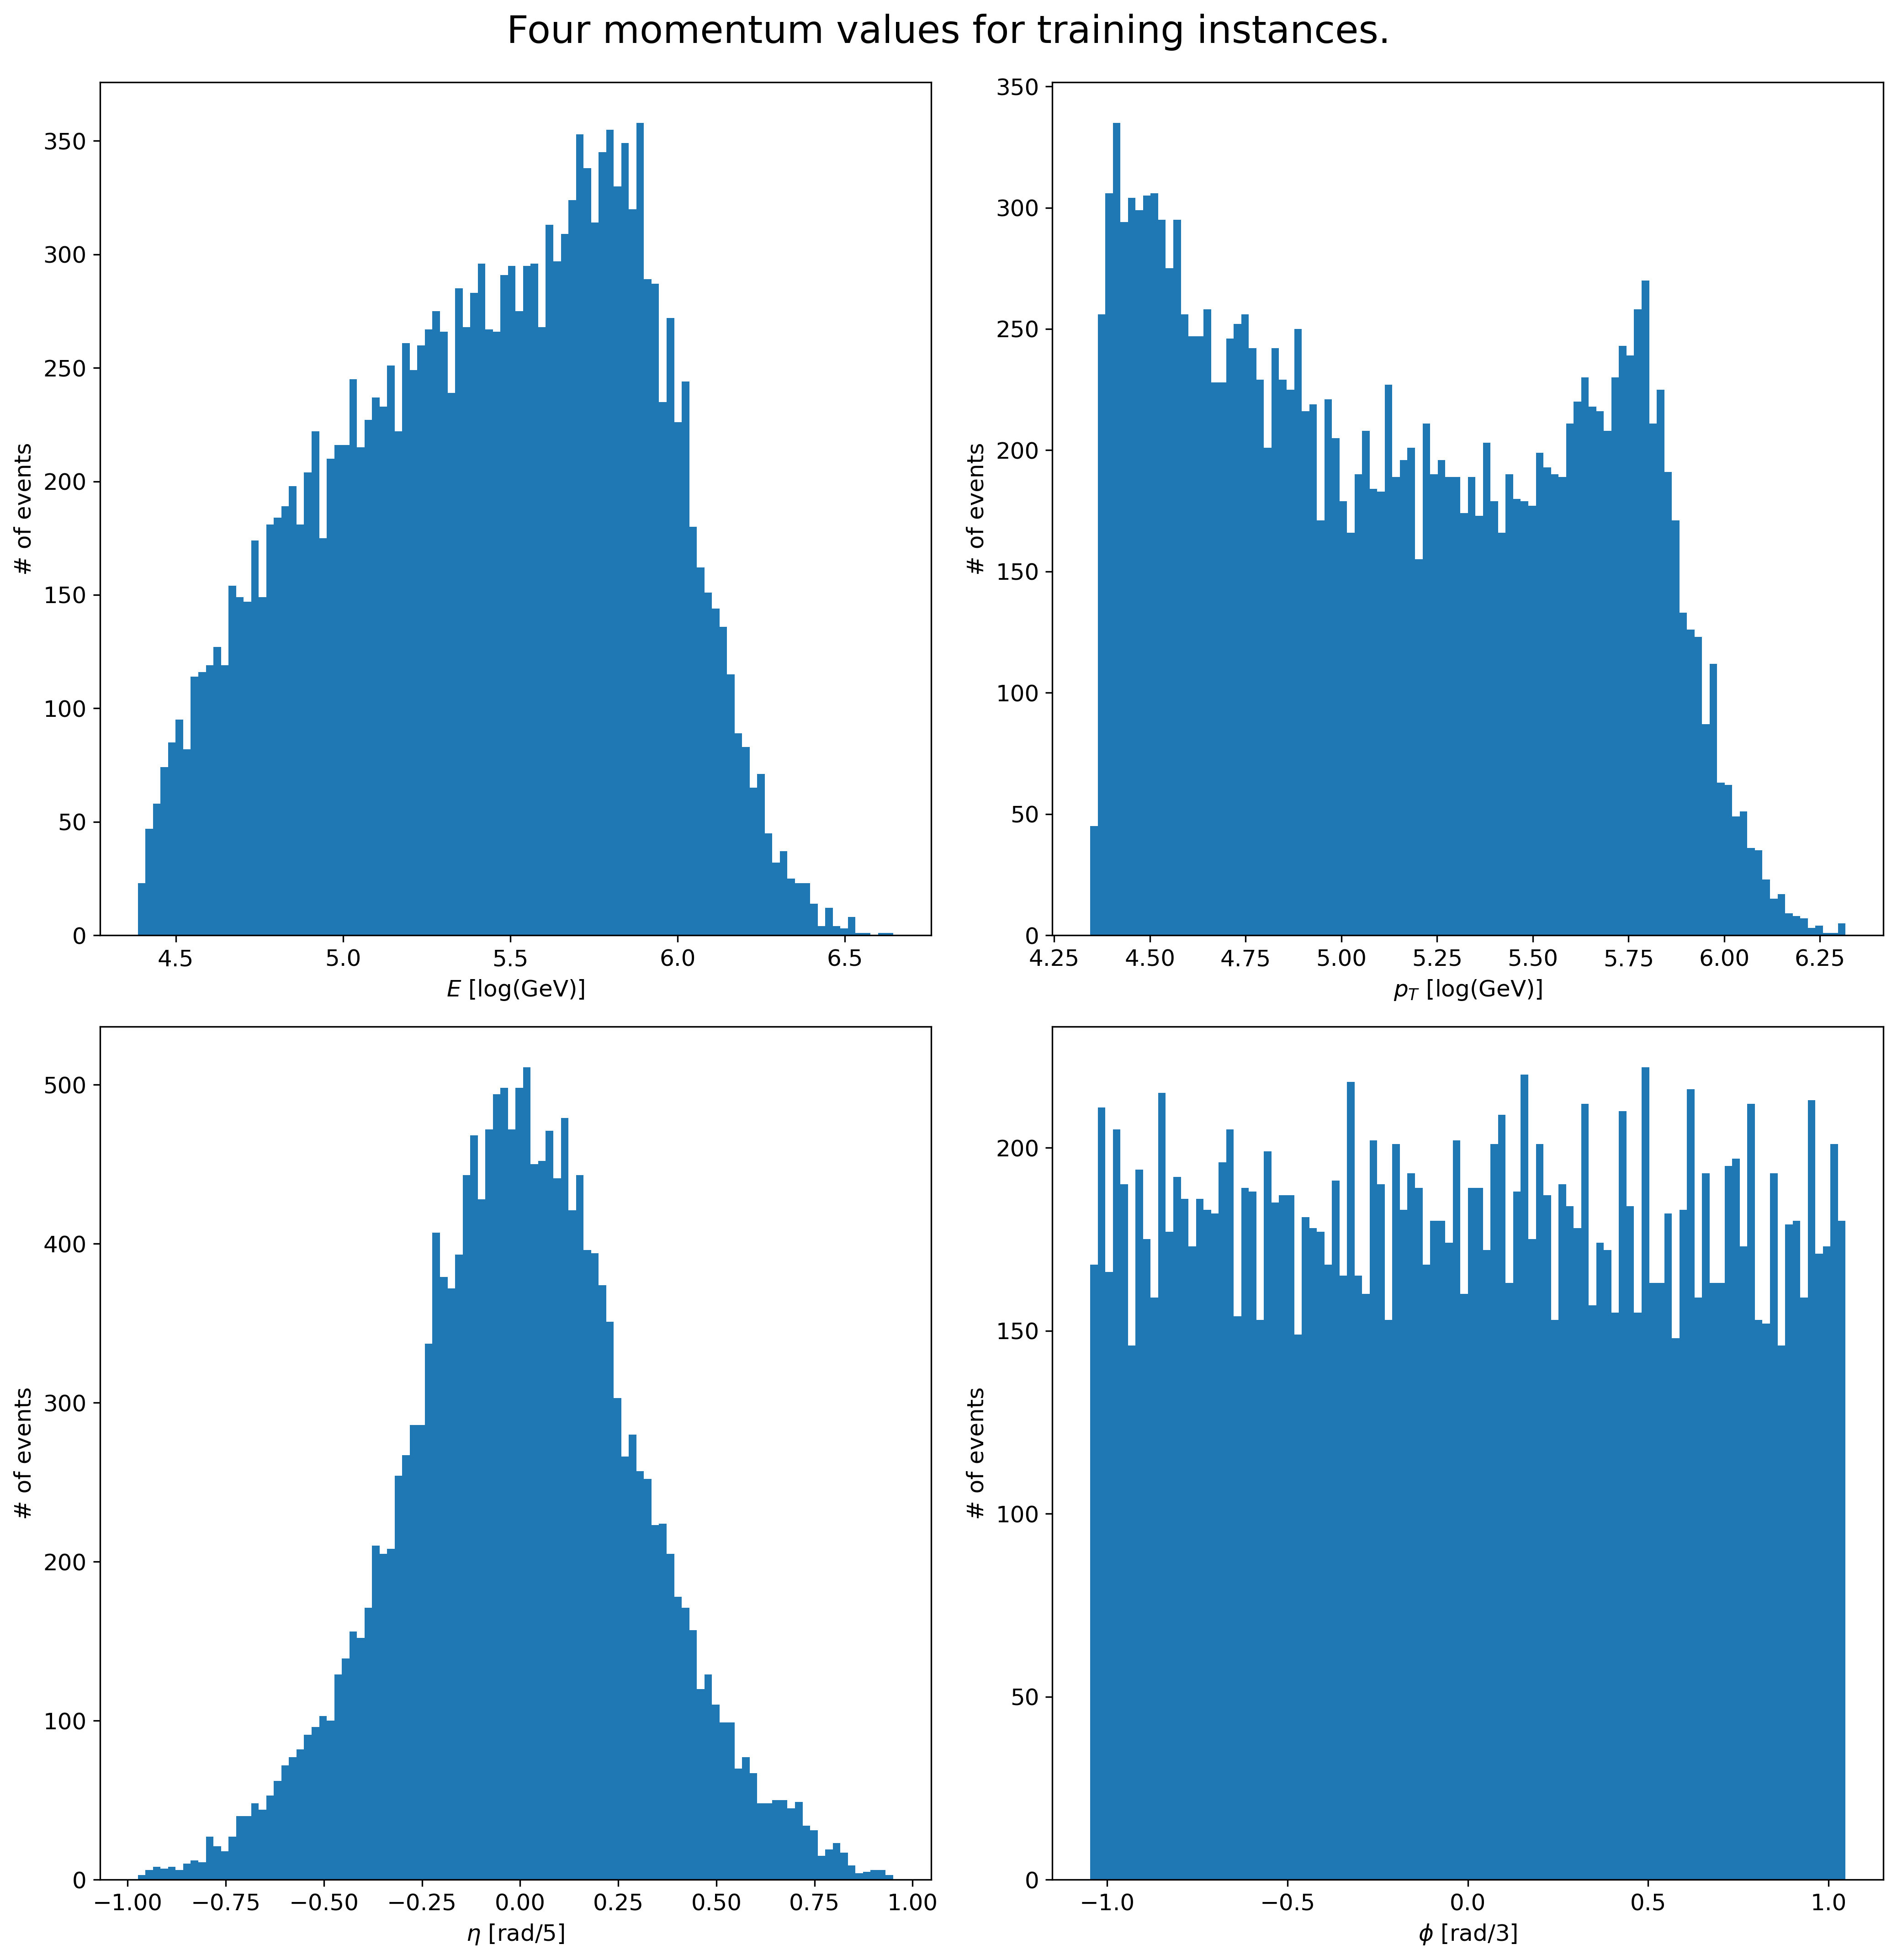

In [51]:
unit_list = ['[log(GeV)]', '[log(GeV)]', '[rad/5]', '[rad/3]']
variable_list = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']

branches=["E","pt","eta","phi"]

n_bins = 100

plt.figure(figsize=(14, 14), dpi=300)

for i in range(0,4):
    plt.subplot(2,2,i+1)
    n_hist_data, bin_edges, _ = plt.hist(train[branches[i]], bins=n_bins)
    plt.xlabel(xlabel=variable_list[i] + ' ' + unit_list[i])
    plt.ylabel('# of events')

plt.suptitle('Four momentum values for training instances.', size = 20, y=1.02)
plt.tight_layout()
plt.savefig("fourmomentum_training", bbox_inches='tight', dpi=300)
plt.show()

## Setting up the network

### Installing prerequisites

Install FastAI. Access to google drive will be requested.

In [ ]:
!pip install torchtext==0.8.1
!pip install -U fastbook
import fastbook
fastbook.setup_book()

### Preparing the data

Adding the two datasets as TensorDatasets to PyTorch (also loading all other classes we'll need later)

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from fastai import learner
from fastai.data import core

train_x = train
test_x = test
train_y = train_x  # y = x since we are building an autoencoder
test_y = test_x

# Constructs a tensor object of the data and wraps them in a TensorDataset object.
train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

We now set things up to load the data, and we use a batch size that was optimized by previous students...note also that this is fastai v2, migration thanks to Jessica Lastow.

In [33]:
batchsize = 256

# Converts the TensorDataset into a DataLoader object and combines into one DataLoaders object (a basic wrapper
# around several DataLoader objects). 
train_dl = DataLoader(train_ds, batch_size=batchsize, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batchsize * 2)
dls = core.DataLoaders(train_dl, valid_dl)

### Preparing the network

Here we have an example network. Details aren't too important, as long as they match what was already trained for us...in this case we have a LeakyReLU, tanh activation function, and a number of layers that goes from 4 to 200 to 20 to 3 (number of features in the hidden layer that we pick for testing compression) and then back all the way to 4. 

In [34]:
class AE_3D_200_LeakyReLU(nn.Module):
    def __init__(self, n_features=4):
        super(AE_3D_200_LeakyReLU, self).__init__()
        self.en1 = nn.Linear(n_features, 200)
        self.en2 = nn.Linear(200, 200)
        self.en3 = nn.Linear(200, 20)
        self.en4 = nn.Linear(20, 3)
        self.de1 = nn.Linear(3, 20)
        self.de2 = nn.Linear(20, 200)
        self.de3 = nn.Linear(200, 200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()

    def encode(self, x):
        return self.en4(self.tanh(self.en3(self.tanh(self.en2(self.tanh(self.en1(x)))))))

    def decode(self, x):
        return self.de4(self.tanh(self.de3(self.tanh(self.de2(self.tanh(self.de1(self.tanh(x))))))))

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        return 'in-200-200-20-3-20-200-200-out'

model = AE_3D_200_LeakyReLU()
model.to('cpu')

AE_3D_200_LeakyReLU(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=200, bias=True)
  (en3): Linear(in_features=200, out_features=20, bias=True)
  (en4): Linear(in_features=20, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=20, bias=True)
  (de2): Linear(in_features=20, out_features=200, bias=True)
  (de3): Linear(in_features=200, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
)

We now have to pick a loss function - MSE loss is appropriate for a compression autoencoder since it reflects the [(input-output)/input] physical quantity that we want to minimize. 

In [37]:
from fastai.metrics import mse

loss_func = nn.MSELoss()

#bn_wd = False  # Don't use weight decay for batchnorm layers
#true_wd = True  # weight decay will be used for all optimizers
wd = 1e-6

recorder = learner.Recorder()
learn = learner.Learner(dls, model=model, wd=wd, loss_func=loss_func, cbs=recorder)
#was: learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

## Alternative 1: Running a pre-trained network

Now we load the pre-trained network. 

In [44]:
# To load pre-trained network, uncomment next line
#learn.load("AE_3D_200")

Then we evaluate the MSE on this network - it should be of the order of 0.001 or less if all has gone well...if it has not trained as well (note the pesky 0-mass peak above...) then it's going to be a bit higher.

In [45]:
#learn.validate()

(#1) [8.352699296665378e-06]

## Alternative 2: Training a new network

Instead of using a pre-trained network, an alternative is to train a new network and use that instead. 

First, we want to find the best learning rate. The learning rate is a hyper-paramater that sets how much the weights of the network will change each step with respect to the loss gradient.

Then we plot the loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate, so we plot with a log scale.

A good value for the learning rates is then either:
- one tenth of the minimum before the divergence
- when the slope is the steepest

Learning rate with the minimum loss: 0.014454397559165954
Learning rate with the steepest gradient: 0.002511886414140463


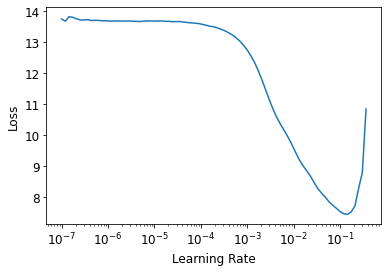

In [38]:
from fastai.callback import schedule

lr_min, lr_steep = learn.lr_find()

print('Learning rate with the minimum loss:', lr_min)
print('Learning rate with the steepest gradient:', lr_steep)

Now we want to run the training!

User-chosen variables:
- n_epoch: The number of epochs, i.e how many times the to run through all of the training data once (i.e the 1266046 entries, see cell 2)
- lr: The learning rate. Either choose lr_min, lr_steep from above or set your own.


In [39]:
import time

start = time.perf_counter() # Starts timer
learn.fit_one_cycle(n_epoch=100)
end = time.perf_counter() # Ends timer
delta_t = end - start
print('Training took', delta_t, 'seconds')

epoch,train_loss,valid_loss,time
0,11.776494,10.399315,00:01
0,11.776494,10.399315,00:01
1,8.488676,5.842845,00:01
1,8.488676,5.842845,00:01
2,4.313142,1.560561,00:00
2,4.313142,1.560561,00:00
3,1.418569,0.247933,00:01
3,1.418569,0.247933,00:01
4,0.511369,0.227267,00:01
4,0.511369,0.227267,00:01


Training took 106.52413757399972 seconds


Then we plot the loss as a function of batches and epochs to check if we reach a plateau.

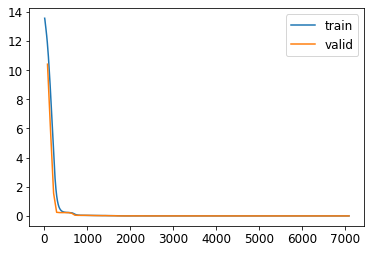

In [40]:
recorder.plot_loss()

Then we evaluate the MSE on this network - it should be of the order of 0.001 or less if all has gone well...if it has not trained as well (note the pesky 0-mass peak above...) then it's going to be a bit higher.

In [42]:
learn.validate()
trainingMSE = learn.validate(dl=train_dl)
validationMSE = learn.validate(dl=valid_dl)
print(f"Training MSE: {trainingMSE} \nValidation MSE: {validationMSE}")

Training MSE: [8.771060493018012e-06] 
Validation MSE: [8.352699296665378e-06]


In [43]:
modelpath = 'AE_3D_200'
learn.save(modelpath)

Path('models/AE_3D_200.pth')

Let's plot all of this, with ratios (thanks to code by Erik Wallin)

## Plotting the outputs of the network

A function in case we want to un-normalize and get back to physical quantities...

In [48]:
def custom_unnormalize(df):
    df['eta'] = df['eta'] * 5
    df['phi'] = df['phi'] * 3
    df['E'] = 10**df['E']
    df['pt'] = 10**(df['pt'])
    return df

Make the histograms from the dataset...

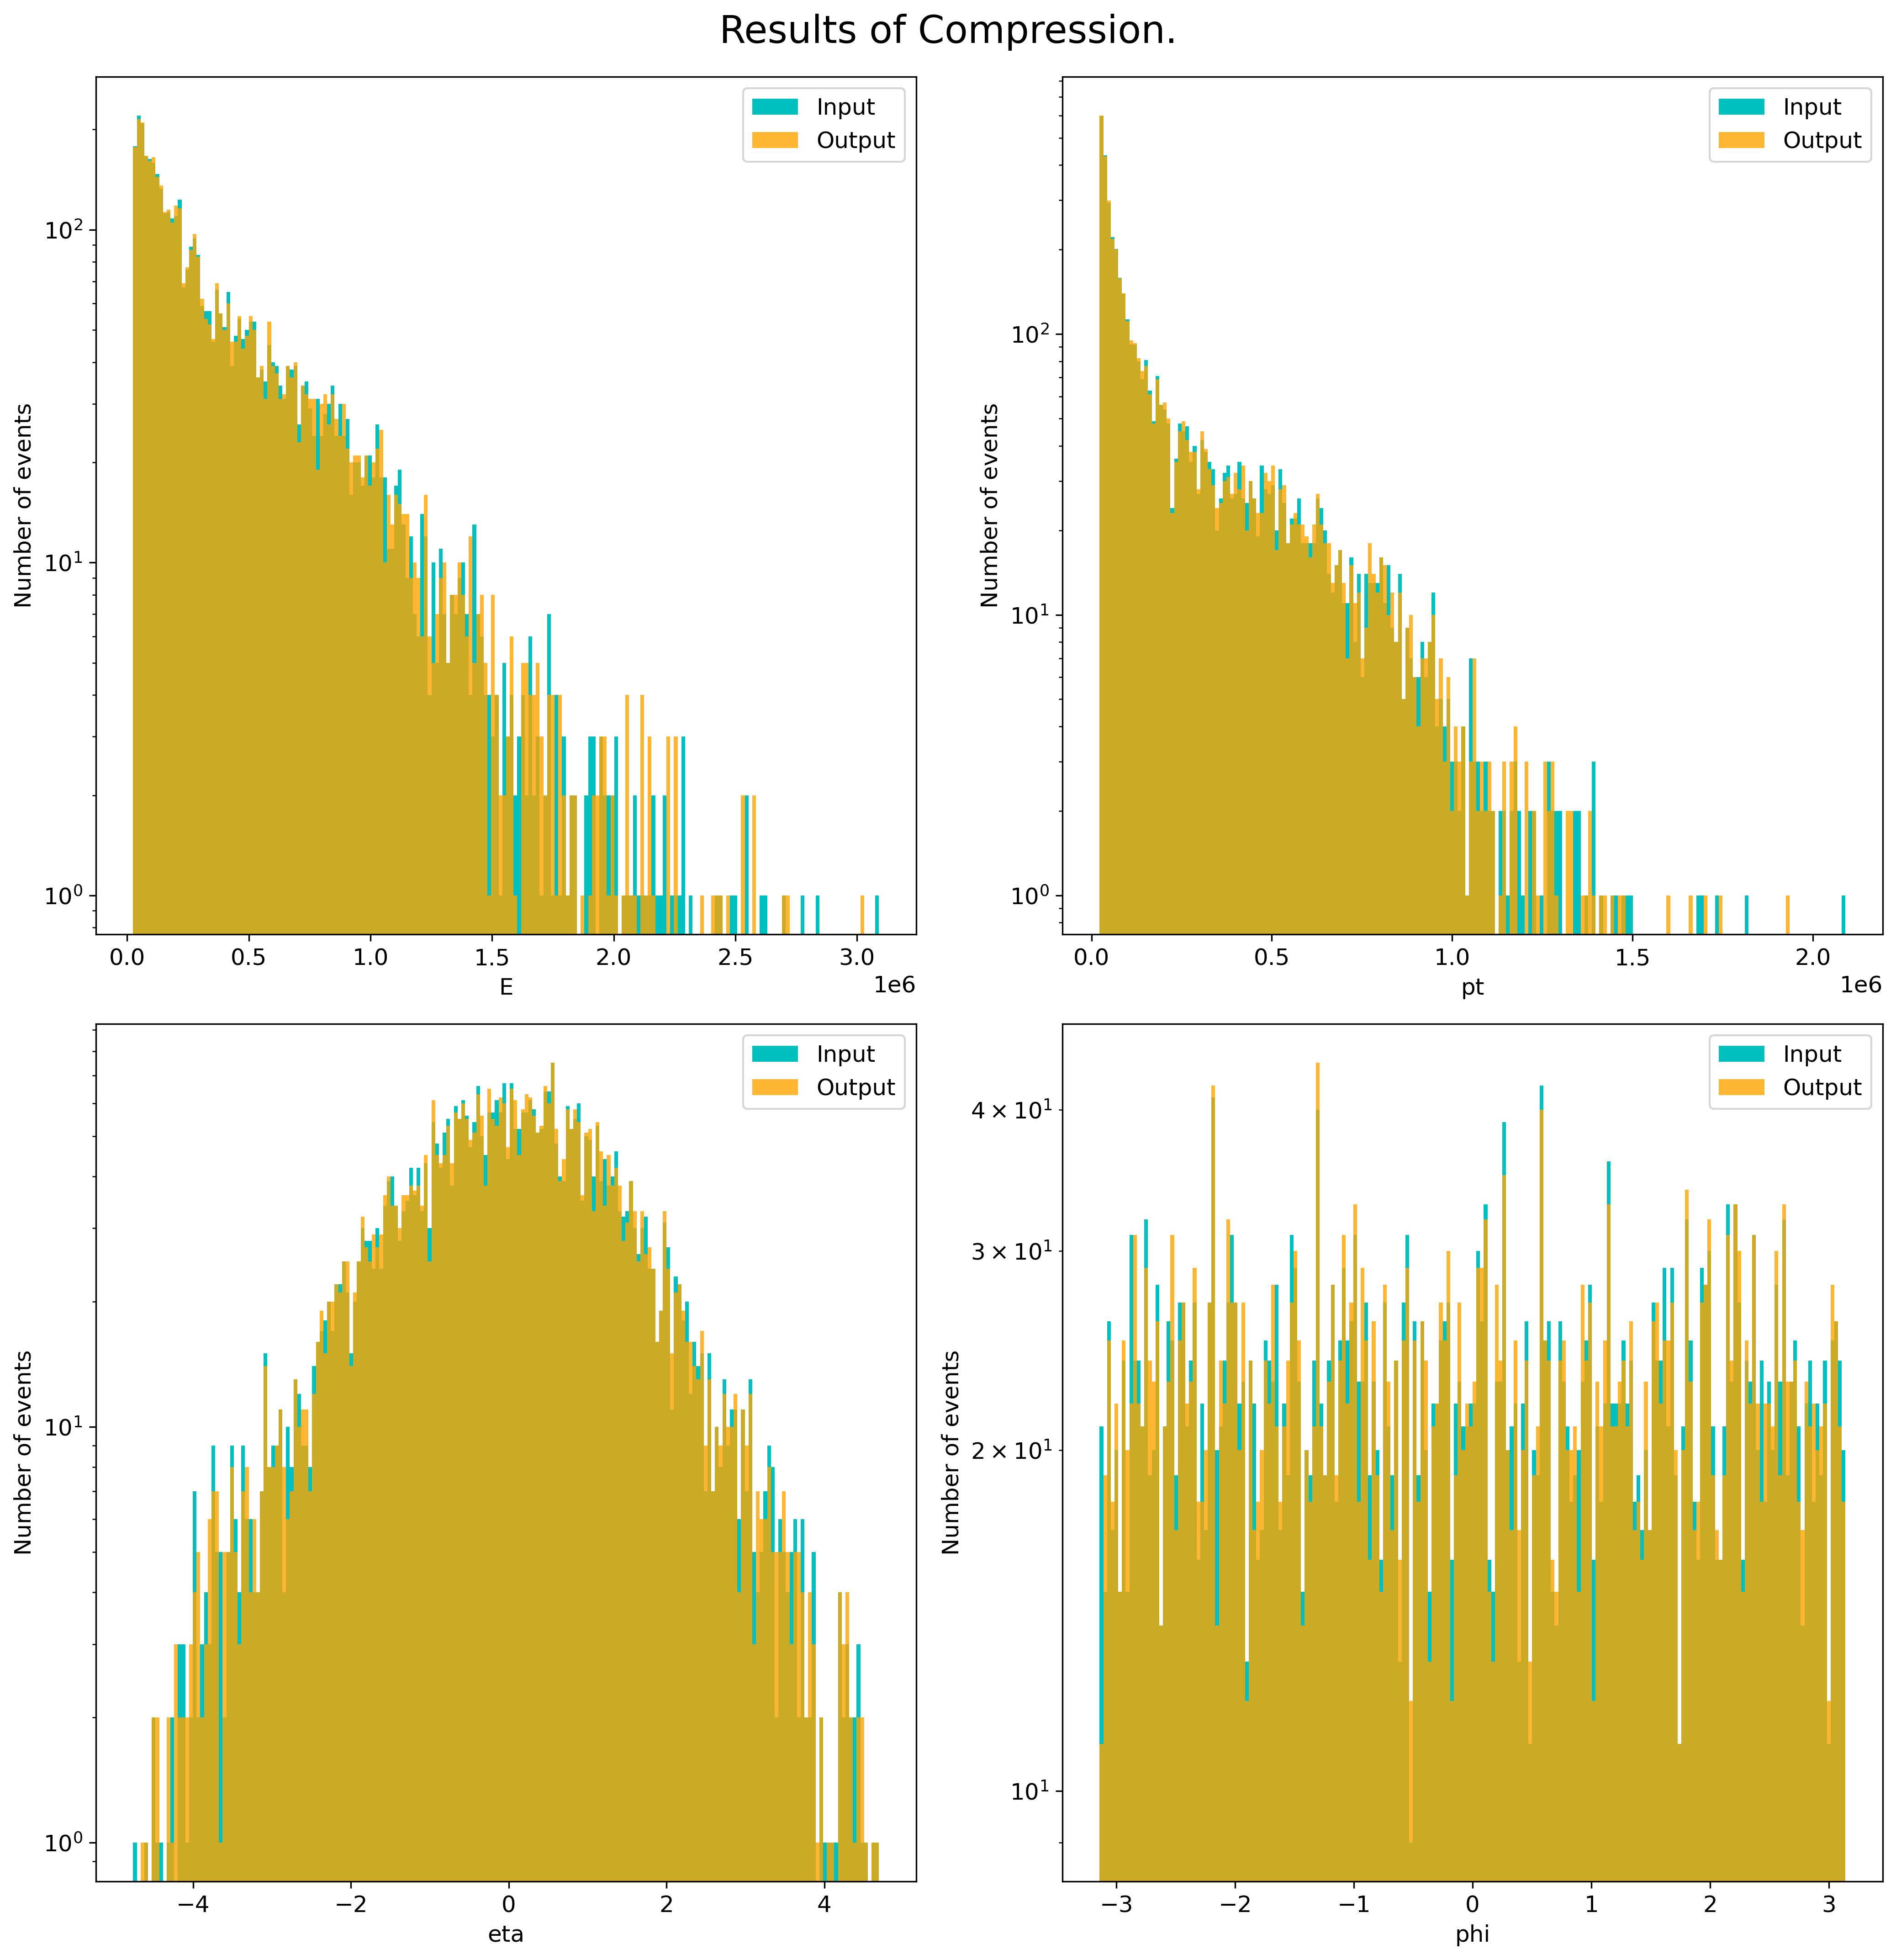

In [55]:
import numpy as np

plt.close('all')
unit_list = ['[GeV]', '[GeV]', '[rad]', '[rad]']
variable_list = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test[idxs[0]:idxs[1]].values, dtype=torch.float)
pred = model(data)
pred = pred.detach().numpy()
data = data.detach().numpy()

data_df = pd.DataFrame(data, columns=test.columns)
pred_df = pd.DataFrame(pred, columns=test.columns)

unnormalized_data_df = custom_unnormalize(data_df)
unnormalized_pred_df = custom_unnormalize(pred_df)    
    
alph = 0.8
n_bins = 200

plt.figure(figsize=(14,14), dpi=300)

for i in np.arange(4):
    plt.subplot(2,2,i+1)
    n_hist_data, bin_edges, _ = plt.hist(data[:, i], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, i], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(test.columns[i])
    plt.xlabel(test.columns[i])
    plt.ylabel('Number of events')
    plt.yscale('log')
    plt.legend()

plt.suptitle('Results of Compression.', size = 20, y = 1.02)
plt.tight_layout()
plt.savefig("compressionresults", bbox_inches='tight', dpi = 300)
plt.show()



As we can see, autoencoder is able to retain most (if not all) data even after reducing 4 variables to 3.

We will now compute average error.

In [53]:
def getRatio(bin1,bin2):
    bins = []
    for b1,b2 in zip(bin1,bin2):
        if b1==0 and b2==0:
            bins.append(0.)
        elif b2==0:
            bins.append(None)
        else:
            bins.append((float(b2)-float(b1))/b1)
    return bins   

rat = getRatio(n_hist_data,n_hist_pred)
print(f'Average Error: {np.mean(rat)}')

Average Error: 0.0064676966606566225


Then, plot average error by bins.

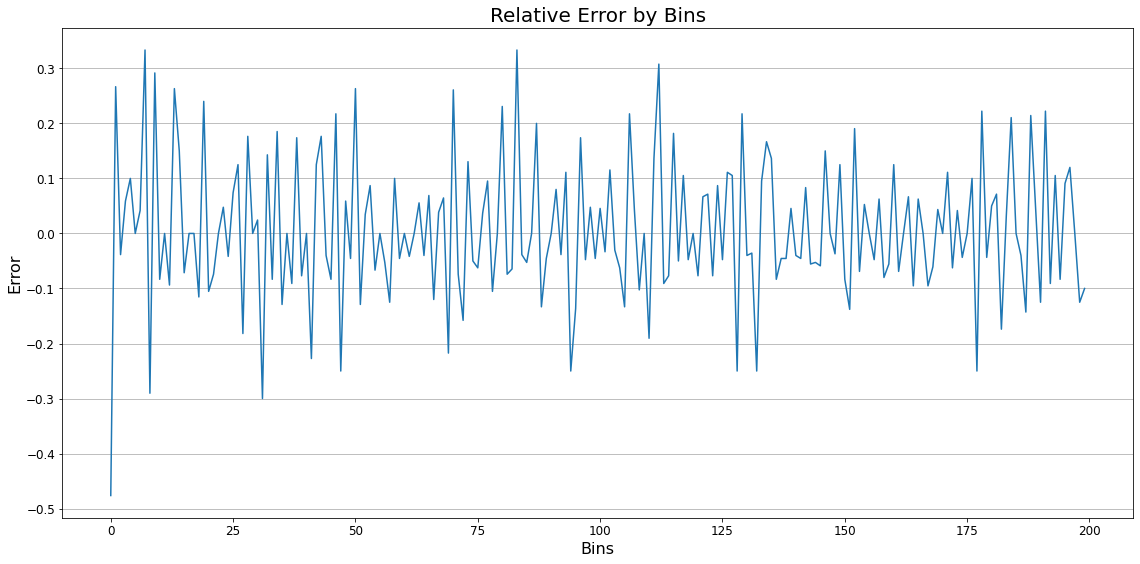

In [54]:
plt.figure(figsize=[16,8])
plt.plot(rat)
plt.xlabel('Bins', size=16)
plt.ylabel('Error', size=16)
plt.title("Relative Error by Bins", size=20)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("relativeerror", bbox_inches='tight', dpi = 300)
plt.show()